# [MachineLearning] 다중 분류

## 타이타닉의 생존자 예측하기

승객의 나이, 성별, 객실 등급, 탑승 장소 등의 특성을 기반으로 승객의 생존 여부를 예측하는 것이 목표입니다. 각 컬럼은 다음과 같습니다.

* PassengerId: 각 승객의 고유 식별자
* Survived: 타깃입니다. 0은 승객이 생존하지 못했음을 의미하고, 1은 생존했음을 의미
* Pclass: 객실 등급
* Name, Sex, Age: 설명이 필요 없는 특성
* SibSp: 타이타닉 호에 탑승한 승객의 형제자매 및 배우자 수
* Parch: 타이타닉에 탑승한 승객의 자녀 및 부모 수
* Ticket: 티켓 ID
* Fare: 지불한 가격(파운드)
* Cabin: 승객의 객실 번호
* Embarked: 승객이 타이타닉 호에 승선한 장소

1. 데이터를 가져와서 train, test 데이터셋을 로드해 보세요.

In [ ]:
# pandas 라이브러리를 pd라는 별칭으로 불러옴
# pandas는 데이터 분석과 조작을 위한 강력한 라이브러리임
import pandas as pd

# 'train.csv' 파일을 읽어서 train_data라는 DataFrame으로 저장
# 학습용 데이터셋을 불러오는 과정
train_data = pd.read_csv('train.csv')

# 'test.csv' 파일을 읽어서 test_data라는 DataFrame으로 저장
# 테스트용 데이터셋을 불러오는 과정
test_data = pd.read_csv('test.csv')

2. 훈련 세트의 상위 몇 줄을 살펴보세요.

In [ ]:
# train_data의 상위 5개 행을 출력하여 데이터 구조를 확인
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# test_data의 상위 5개 행을 출력
# test_data에는 Survived(생존 여부) 열이 없음 - 이는 예측해야 할 타겟값이기 때문
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


3. PassengerId 열을 인덱스 열로 설정해 보세요.

In [ ]:
# train_data의 인덱스를 'PassengerId' 열로 설정
# 각 승객을 고유하게 식별할 수 있는 PassengerId를 인덱스로 사용
train_data = train_data.set_index("PassengerId")

# test_data의 인덱스도 마찬가지로 'PassengerId' 열로 설정
test_data = test_data.set_index("PassengerId")


In [ ]:
# 변경된 train_data의 전체 내용을 출력하여 확인
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


4. 누락된 데이터의 양을 확인하기 위해 자세한 정보를 확인해 보세요.

In [ ]:
# train_data의 기본 정보를 출력
# 데이터 타입, null 값 개수, 메모리 사용량 등을 확인할 수 있음
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


5. 숫자 특성을 살펴보세요.

In [ ]:
# 수치형 데이터의 기술 통계량을 계산하여 출력
# count(개수), mean(평균), std(표준편차), min(최솟값), 25%/50%/75% 분위수, max(최댓값) 확인
# null 값은 자동으로 계산에서 제외됨
train_data.describe() # describe() -> 다양한 통계량을 요약해주는 굉장히 편리한 메서드
                      # Null값은 기본적으로 제외된다.

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6. 타깃이 실제로 0 또는 1인지 확인해 보세요.

In [ ]:
# Survived 열의 고유값들을 출력
# 생존 여부를 나타내는 값들이 어떤 것들이 있는지 확인 (0: 사망, 1: 생존)
train_data["Survived"].unique()

array([0, 1])

In [ ]:
# Survived 열의 각 값들의 빈도수를 계산
# 생존자와 사망자의 수를 확인
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

7. 모든 범주형 특성에 대해 범주별로 데이터가 얼마나 존재하는지 살펴보세요.

In [ ]:
# Pclass(객실 등급)의 빈도수를 계산
# 각 등급별 승객 수를 확인 (1등급, 2등급, 3등급)
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
# Sex(성별) 열의 빈도수를 계산
# 남성과 여성 승객의 수를 확인
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
# Embarked(승선 항구) 열의 빈도수를 계산
# 각 항구별 승선 승객 수를 확인 (C: 셰르부르, Q: 퀸즈타운, S: 사우샘프턴)
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

8. 이제 숫자 특성에 대한 파이프라인부터 시작하여 전처리 파이프라인을 구축해 보세요. 결측치를 중앙값으로 채우는 SimpleImputer와 데이터를 표준화하는 StandardScaler를 연속적으로 적용하는 파이프라인을 생성하세요.

SimpleImputer의 strategy 파라미터로 사용할 수 있는 옵션들:

```python
SimpleImputer(strategy="")
```

1. `"mean"`:
   - 결측치를 해당 특성(열)의 평균값으로 대체
   - 수치형 데이터에만 사용 가능

2. `"median"`:
   - 결측치를 해당 특성의 중앙값으로 대체
   - 수치형 데이터에만 사용 가능
   - 이상치(outlier)가 있는 경우 mean보다 더 robust한 결과를 제공

3. `"most_frequent"`:
   - 결측치를 해당 특성에서 가장 빈번하게 등장하는 값으로 대체
   - 수치형, 범주형 데이터 모두 사용 가능
   - 최빈값이 여러 개인 경우 가장 먼저 나타난 값을 사용

4. `"constant"`:
   - 결측치를 지정한 특정 값으로 대체
   - `fill_value` 파라미터로 대체할 값을 지정
   - 예: `SimpleImputer(strategy="constant", fill_value=0)`

scikit-learn 0.22 버전부터는 범주형 데이터를 위한 새로운 옵션이 추가

5. `"constant"` with `missing_values="missing"`:
   - 문자열 "missing"을 결측 범주형 데이터에 사용할 수 있음
   - 예: `SimpleImputer(strategy="constant", fill_value="missing")`


```python
# 평균값으로 대체
imputer_mean = SimpleImputer(strategy="mean")

# 중앙값으로 대체
imputer_median = SimpleImputer(strategy="median")

# 최빈값으로 대체
imputer_most_frequent = SimpleImputer(strategy="most_frequent")

# 상수값(0)으로 대체
imputer_constant = SimpleImputer(strategy="constant", fill_value=0)
```

In [ ]:
# Pipeline을 사용하기 위한 모듈 임포트
# Pipeline은 여러 전처리 단계와 모델 학습을 순차적으로 연결하여 한 번에 실행할 수 있게 해줌
from sklearn.pipeline import Pipeline

# SimpleImputer 모듈 임포트
# 결측치를 처리하기 위한 도구
# pandas의 fillna()보다 여러 특성의 결측치를 한 번에 처리할 때 더 효율적
from sklearn.impute import SimpleImputer

# StandardScaler 모듈 임포트
# 데이터를 정규화(표준화)하기 위한 도구
# 각 특성의 평균을 0, 표준편차를 1로 변환하여 스케일을 통일
from sklearn.preprocessing import StandardScaler

# 수치형 데이터를 위한 파이프라인 생성
num_pipeline = Pipeline([
        # 1단계: 결측치 처리
        # strategy="median"으로 설정하여 결측치를 해당 특성의 중앙값으로 대체
        ("imputer", SimpleImputer(strategy="median")),

        # 2단계: 특성 스케일링
        # 데이터를 표준화하여 평균 0, 분산 1인 정규분포 형태로 변환
        ("scaler", StandardScaler())
    ])

# 생성된 파이프라인 객체 확인
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

9. 범주형 특성에 대한 파이프라인을 구축하세요. OrdinalEncoder를 사용하여 범주형 데이터의 각 범주를 정수 값으로 변환하는 단계를 파이프라인에 추가하세요. SimpleImputer를 사용하여 결측치를 가장 빈번하게 나타나는 값으로 채우는 단계를 파이프라인에 추가하세요. 여기서는 strategy="most_frequent" 옵션을 사용합니다. OneHotEncoder를 사용하여 범주형 데이터를 원-핫 인코딩된 형태로 변환하는 단계를 파이프라인에 추가하세요. 이때, sparse_output=False 옵션을 사용하여 반환되는 배열이 희소 행렬이 아닌 밀집 배열이 되도록 설정합니다.

안 될 경우 : pip install category_encoders

In [ ]:
# 범주형 데이터 처리를 위한 인코더 임포트
# OrdinalEncoder: 범주형 데이터를 순서가 있는 정수값으로 변환
# OneHotEncoder: 범주형 데이터를 이진 벡터로 변환
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# 범주형 데이터를 위한 파이프라인 생성
cat_pipeline = Pipeline([
        # 1단계: 순서형 인코딩
        # 범주형 데이터를 숫자로 변환 (예: ['male', 'female'] -> [0, 1])
        ("ordinal_encoder", OrdinalEncoder()),

        # 2단계: 결측치 처리
        # 범주형 데이터의 결측치를 최빈값으로 대체
        # 예: 가장 많이 등장하는 범주값으로 결측치를 채움
        ("imputer", SimpleImputer(strategy="most_frequent")),

        # 3단계: 원-핫 인코딩
        # 범주형 변수를 이진 벡터로 변환
        # sparse_output=False: 일반 배열 형태로 출력 (희소 행렬 대신)
        # 예: [0] -> [1, 0, 0], [1] -> [0, 1, 0], [2] -> [0, 0, 1]
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

# 생성된 파이프라인 객체 확인
cat_pipeline

Pipeline(steps=[('ordinal_encoder', OrdinalEncoder()),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder', OneHotEncoder(sparse_output=False))])

In [ ]:
# OrdinalEncoder() == 순서가 있는 경우 적합, 연관있는 변수

# 순서가 있는 범주형 데이터 예시
# 예: 학력 수준, 만족도 등급 등 순서가 의미있는 경우
data = [['low'], ['medium'], ['high'], ['medium']]

# OrdinalEncoder를 사용하여 순서가 있는 범주형 데이터를 숫자로 변환
# categories 파라미터로 명시적으로 순서 지정 (낮음 -> 높음)
# 결과: low -> 0, medium -> 1, high -> 2로 변환됨
OrdinalEncoder(categories=[['low', 'medium', 'high']]).fit_transform(data)

array([[0.],
       [1.],
       [2.],
       [1.]])

In [ ]:
# OneHotEncoder() == 순서가 없는 경우 적합, 독립적인 변수

# 순서가 없는 범주형 데이터 예시
# 예: 색상, 혈액형 등 독립적인 카테고리인 경우
data = [['red'], ['green'], ['blue'], ['green']]

# OneHotEncoder를 사용하여 각 범주를 독립적인 이진 특성으로 변환
# toarray()를 호출하여 희소 행렬을 일반 배열로 변환
# 결과: red   -> [1, 0, 0]
#       green -> [0, 1, 0]
#       blue  -> [0, 0, 1]
#       green -> [0, 1, 0]
OneHotEncoder().fit_transform(data).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

10. 숫자 파이프라인과 범주 파이프라인을 결합해 보세요.

In [ ]:
# ColumnTransformer 임포트
# 서로 다른 전처리 파이프라인을 각각의 열에 적용할 수 있게 해주는 도구
from sklearn.compose import ColumnTransformer

# 수치형 특성들의 이름을 리스트로 정의
# Age: 나이
# SibSp: 함께 탑승한 형제/배우자 수
# Parch: 함께 탑승한 부모/자녀 수
# Fare: 운임
num_attribs = ["Age", "SibSp", "Parch", "Fare"]

# 범주형 특성들의 이름을 리스트로 정의
# Pclass: 객실 등급
# Sex: 성별
# Embarked: 승선 항구
cat_attribs = ["Pclass", "Sex", "Embarked"]

# 전체 전처리 파이프라인 구성
preprocess_pipeline = ColumnTransformer([
        # 수치형 데이터 전처리 파이프라인 지정
        # (이름, 파이프라인, 적용할 열 리스트)
        ("num_pipeline", num_pipeline, num_attribs),

        # 범주형 데이터 전처리 파이프라인 지정
        # (이름, 파이프라인, 적용할 열 리스트)
        ("cat_pipeline", cat_pipeline, cat_attribs),
    ])

# 생성된 전처리 파이프라인 객체 확인
preprocess_pipeline

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

11. 훈련 데이터에 대한 전처리를 수행하고, 결과를 X_train에 할당하세요.

In [ ]:
# 전처리 파이프라인을 학습 데이터에 적용
# fit_transform()은 파이프라인을 학습(fit)하고 변환(transform)을 동시에 수행
# 이 과정에서 각 열의 스케일링에 필요한 통계량(평균, 표준편차 등)이 계산되고 저장됨
X_train = preprocess_pipeline.fit_transform(train_data)

# 전처리된 데이터를 DataFrame으로 변환하여 확인
# 수치형 변수들은 스케일링되어 있고, 범주형 변수들은 원-핫 인코딩되어 있음
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,-0.796285,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,-0.104637,0.432793,2.008933,-0.176263,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,-0.258337,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


12. 타깃 변수도 할당하세요.

In [ ]:
# 타겟 변수(Survived) 추출
# y_train은 생존 여부를 나타내는 레이블(0: 사망, 1: 생존)
y_train = train_data["Survived"]

# 타겟 변수 확인
y_train

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


13. RandomForestClassifier를 사용해 보세요. 이때, n_estimators 매개변수를 100으로 설정하여 결정 트리의 개수를 100개로 지정하고, random_state 매개변수를 42로 설정하여 결과의 재현성을 보장하세요.

**RandomForestClassifier -> 앙상블 트리 분류기**

다중 클래스 분류에 적합

In [ ]:
# RandomForestClassifier 임포트
# 여러 개의 의사결정 트리를 생성하여 그들의 예측을 종합하는 앙상블 학습 방법
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 객체 생성
# n_estimators=100: 100개의 의사결정 트리를 생성
# random_state=42: 재현성을 위한 랜덤 시드 설정
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 전처리된 학습 데이터로 모델을 학습
# X_train: 전처리된 특성 데이터
# y_train: 생존 여부 레이블
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

14. 테스트에 대한 예측을 수행하세요.

In [ ]:
# 테스트 데이터의 처음 5행을 확인
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 테스트 데이터에 전처리 파이프라인 적용
# transform()만 호출하는 이유: 이미 fit_transform()으로 학습된 파이프라인을 사용하기 때문
X_test = preprocess_pipeline.transform(test_data)

# 전처리된 테스트 데이터로 생존 여부 예측
# 각 승객의 생존 여부(0: 사망, 1: 생존)를 예측
y_pred = forest_clf.predict(X_test)

# 예측 결과 확인
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
Copy# copy 모듈 임포트 (깊은 복사를 위해 필요)
import copy

# 테스트 데이터를 깊은 복사하여 새로운 DataFrame 생성
# 원본 데이터를 보존하기 위해 깊은 복사 사용
pred_df = copy.deepcopy(test_data)

# 예측 결과를 새로운 'Survived' 열로 추가
pred_df['Survived'] = y_pred

# 예측 결과가 포함된 DataFrame의 처음 5행 확인
pred_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


15. 랜덤 포레스트 분류기의 교차 검증을 수행하세요. 사용할 훈련 데이터는 X_train과 y_train입니다. 교차 검증의 폴드 수는 10으로 설정하세요. 교차 검증을 통해 얻은 점수의 평균을 계산하여, 랜덤 포레스트 분류기의 평균 성능을 평가하세요.

In [ ]:
# 교차 검증을 위한 cross_val_score 임포트
from sklearn.model_selection import cross_val_score

# 교차 검증 수행
# cv=10: 데이터를 10개의 폴드로 나누어 검증
# 각 폴드마다 정확도(accuracy) 점수를 계산
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

# 교차 검증 점수의 평균을 출력 (소수점 3자리까지)
print("평균 점수 : %0.3f" %forest_scores.mean())

평균 점수 : 0.814


16. 교차 검증으로 예측 확률을 계산하는 코드를 작성하고, 결과를 출력하세요. 메소드는 'predict_proba'를 사용합니다.

In [ ]:
# 예측 확률을 계산하기 위한 cross_val_predict 임포트
from sklearn.model_selection import cross_val_predict

# 교차 검증을 통한 예측 확률 계산
# cv=3: 데이터를 3개의 폴드로 나눔
# method="predict_proba": 각 클래스에 대한 소속 확률을 반환
# 결과는 [클래스 0에 속할 확률, 클래스 1에 속할 확률] 형태
y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                           method="predict_proba")

# 예측 확률 확인
y_scores

array([[0.88, 0.12],
       [0.01, 0.99],
       [0.76, 0.24],
       ...,
       [0.63, 0.37],
       [0.81, 0.19],
       [0.39, 0.61]])

17. 학습 데이터셋으로 모델을 학습시킨 후, 같은 데이터셋에 대해 예측을 수행합니다. 이후, 정확도(accuracy), 정밀도(precision), 재현율(recall)을 계산하여 모델의 성능을 평가하세요.

In [ ]:
# 모델 평가를 위한 다양한 지표 임포트
# accuracy_score: 정확도 (전체 중 맞춘 비율)
# precision_score: 정밀도 (양성으로 예측한 것 중 실제 양성 비율)
# recall_score: 재현율 (실제 양성 중 양성으로 예측한 비율)
from sklearn.metrics import precision_score, recall_score, accuracy_score

# 학습 데이터에 대한 예측 수행
y_pred_train = forest_clf.predict(X_train)

# 정확도 계산
# (전체 데이터 중 정확하게 예측한 비율)
accuracy = accuracy_score(y_train, y_pred_train)

# 정밀도 계산
# (생존자로 예측한 승객 중 실제 생존자 비율)
precision = precision_score(y_train, y_pred_train)

# 재현율 계산
# (실제 생존자 중 생존자로 예측한 비율)
recall = recall_score(y_train, y_pred_train)

# 각 평가 지표 출력
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall', recall)

In [ ]:
# 분류 결과에 대한 상세 리포트를 위한 함수 임포트
from sklearn.metrics import classification_report

# 분류 결과의 상세 리포트 출력
# precision, recall, f1-score, support 등의 지표를 클래스별로 출력
print(classification_report(y_train, y_pred_train))

18. RandomForestClassifier로 생존 확률을 예측한 결과를 바탕으로, 정밀도와 재현율을 임계값의 함수로 나타내는 그래프를 그려보세요.

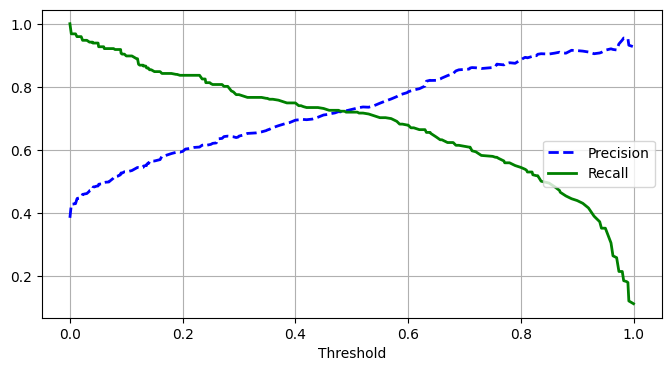

In [ ]:
# matplotlib과 precision_recall_curve 임포트
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 정밀도-재현율 곡선을 위한 값들을 계산
# y_scores[:,1]은 양성 클래스(생존)에 대한 예측 확률
# 임계값에 따른 정밀도, 재현도 배열 / 계산하는데 사용된 임계값 배열
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])  # 양성클래스(1)에 대한 예측 확률



# 그래프 크기 설정 및 그리기
plt.figure(figsize=(8, 4))
# 정밀도 곡선 그리기 (파란 점선)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
# 재현율 곡선 그리기 (녹색 실선)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # 최적의 임계값을 선택 -> 모델의 성능 조정

# 그래프 꾸미기
plt.grid()  # 격자 추가
plt.xlabel("Threshold")  # x축 레이블
plt.legend(loc="center right")  # 범례 위치 설정

# 그래프 표시
plt.show()

19. 이번에는 SVM 분류기를 사용해 보세요. 교차 검증을 통해 모델의 성능을 평가해 보세요. 교차 검증 폴드 수는 10으로 설정하세요. probability=True로 설정하여 확률 추정을 활성화하고 random_state=42로 설정하세요.

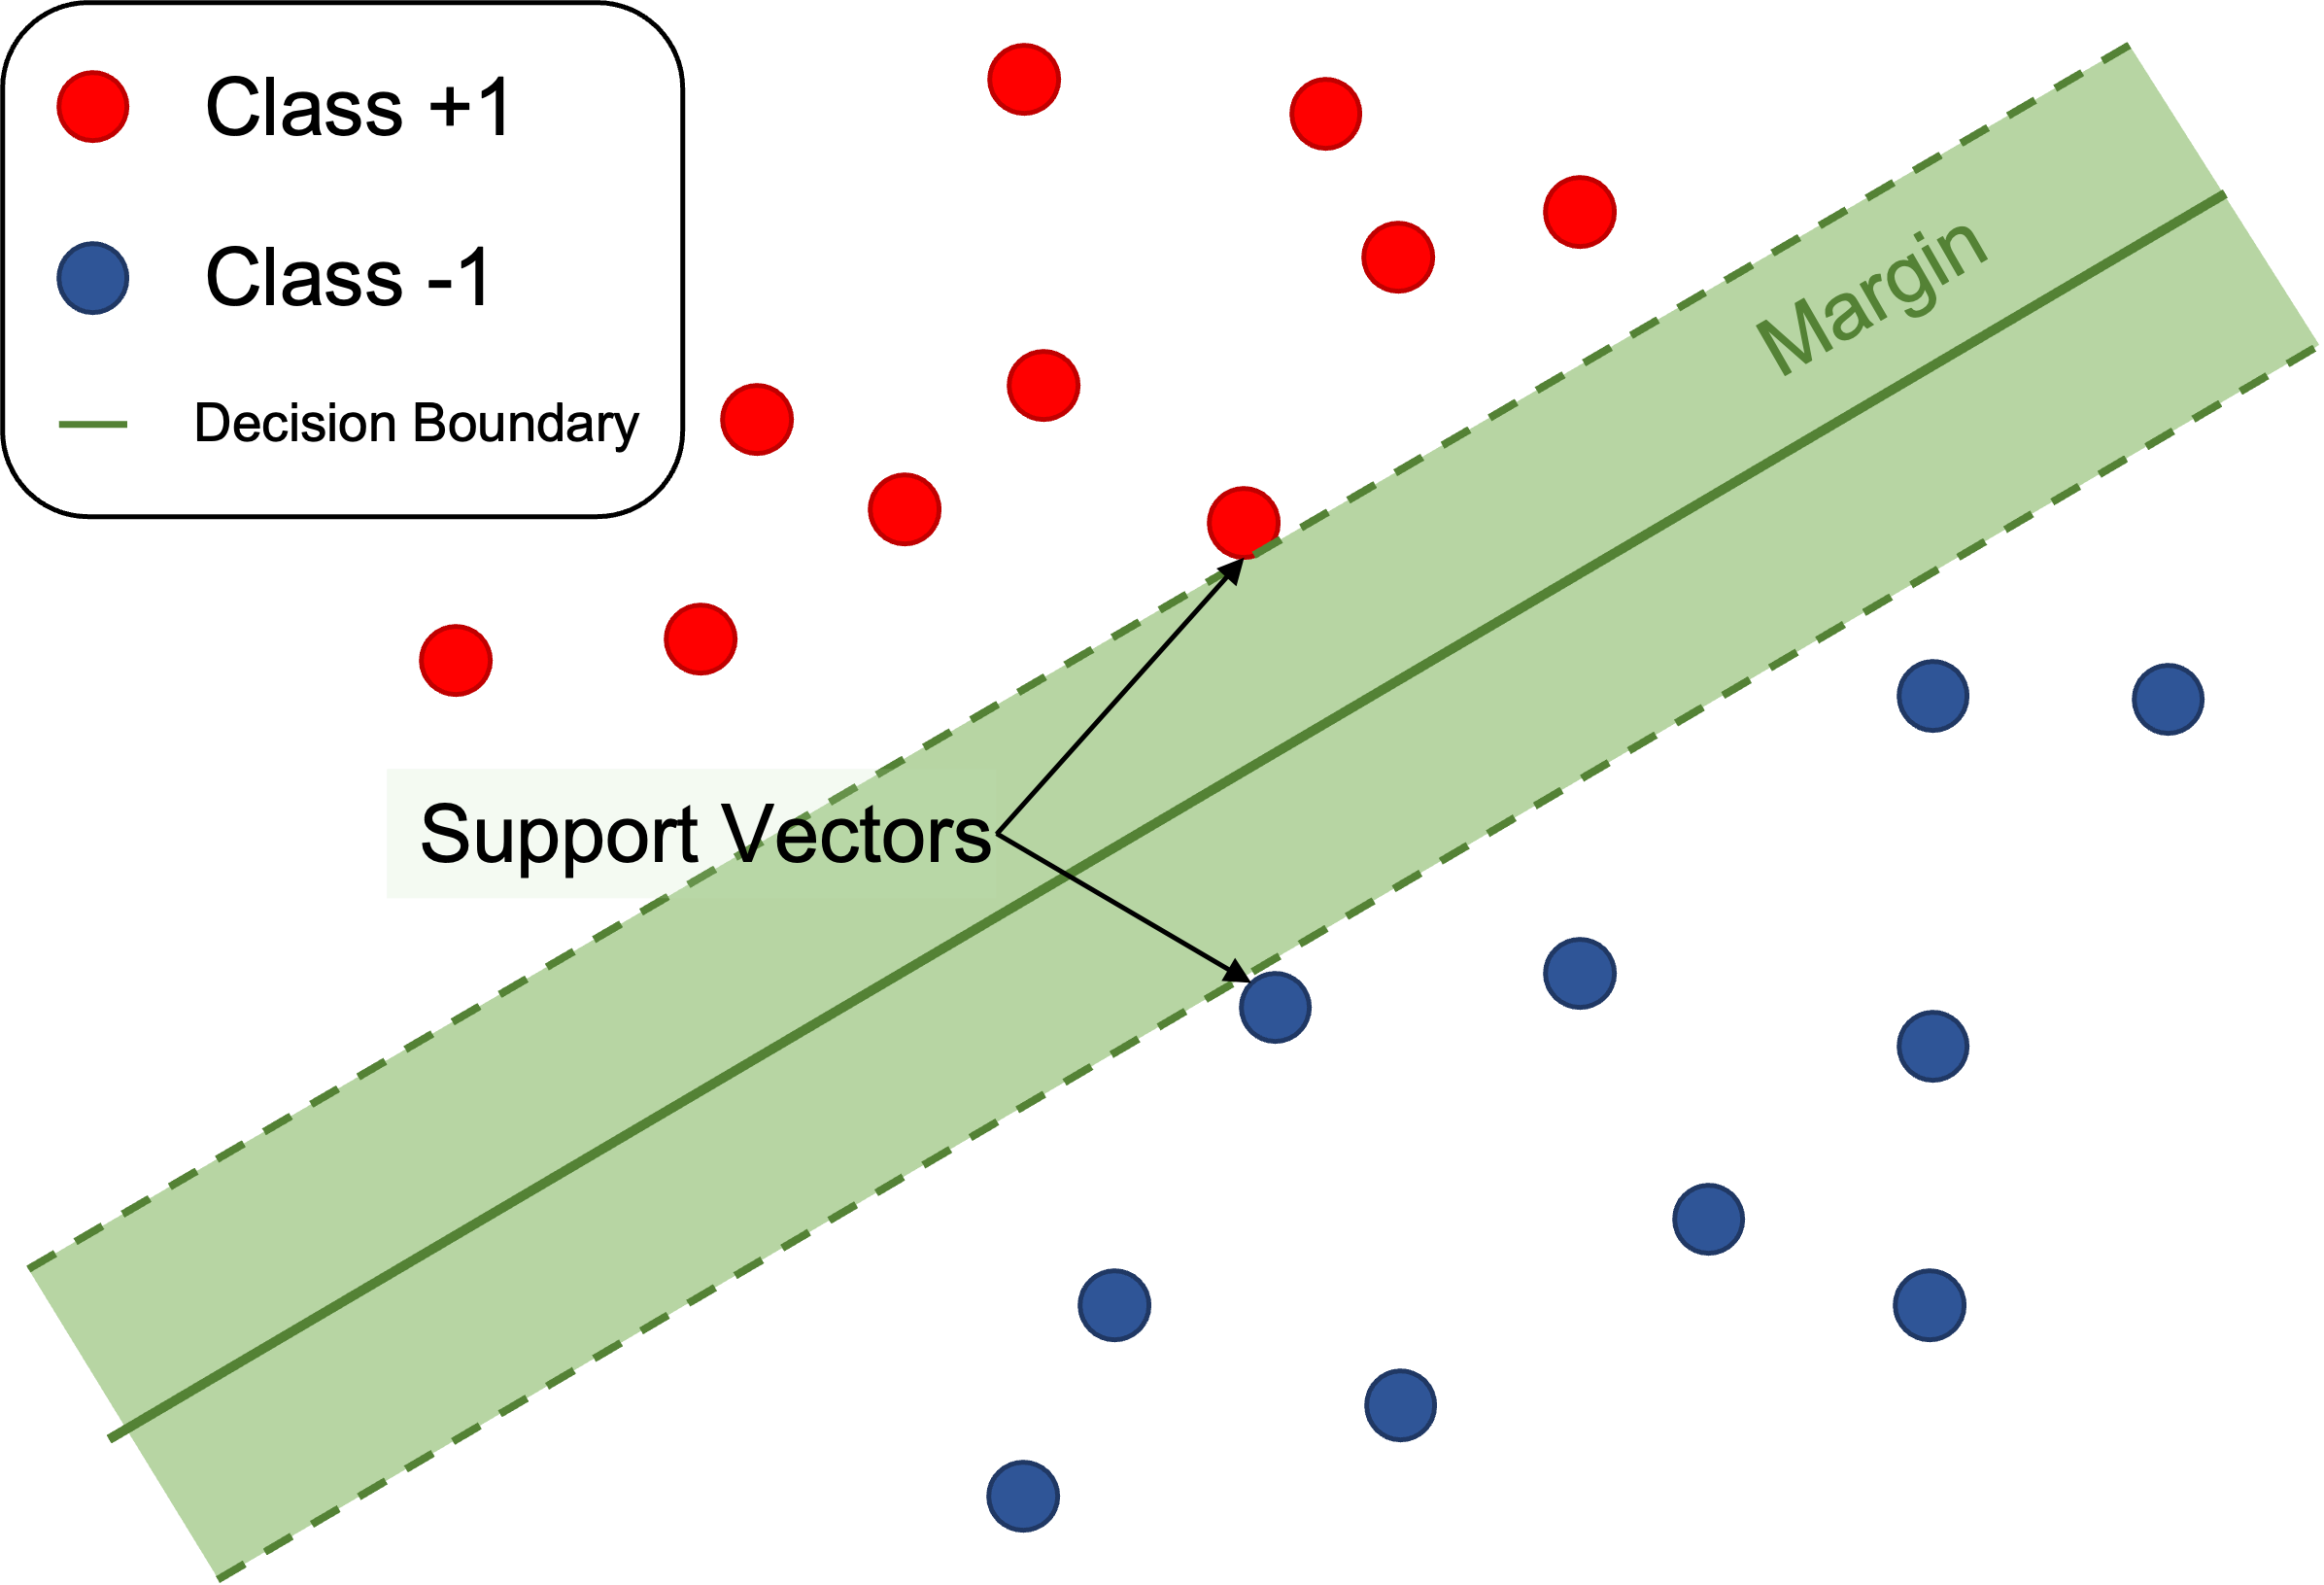

In [ ]:
# 서포트 벡터 머신 분류기 임포트
from sklearn.svm import SVC
# SVM = 지도학습 알고리즘 (분류, 회귀 분석에 적합)

# SVM 모델 생성
# probability=True: 확률 예측 활성화
# random_state=42: 재현성을 위한 시드 설정
svm_clf = SVC(probability=True, random_state=42)

# 교차 검증 수행
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
# 평균 점수 계산
svm_scores.mean()

0.8249438202247191

20. 교차 검증으로 예측 확률을 계산하는 코드를 작성하고, 결과를 출력하세요. 메소드는 'predict_proba'를 사용합니다.

In [ ]:
# 교차 검증을 통한 예측 수행
y_svm_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
# 예측값의 분포 확인
pd.DataFrame(y_svm_pred).value_counts()

0    586
1    305
Name: count, dtype: int64

In [ ]:
# 예측 확률 계산
y_scores_svm = cross_val_predict(svm_clf, X_train, y_train, cv=3,
                            method="predict_proba") # 확률 반환
print(y_scores_svm)

[[0.88873984 0.11126016]
 [0.06508819 0.93491181]
 [0.26222013 0.73777987]
 ...
 [0.56057833 0.43942167]
 [0.84461197 0.15538803]
 [0.84400909 0.15599091]]


21. 학습 데이터셋으로 모델을 학습시킨 후, 같은 데이터셋에 대해 예측을 수행합니다. 이후, 정확도(accuracy), 정밀도(precision), 재현율(recall)을 계산하여 모델의 성능을 평가하세요.

In [ ]:
# SVM 모델 학습
svm_clf.fit(X_train, y_train)

# 학습 데이터에 대한 예측 수행
y_pred_train = svm_clf.predict(X_train)

# 각종 평가 지표 계산
accuracy = accuracy_score(y_train, y_pred_train)  # 정확도
precision = precision_score(y_train, y_pred_train)  # 정밀도
recall = recall_score(y_train, y_pred_train)  # 재현율

# 평가 지표 출력
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall', recall)

Accuracy: 0.8383838383838383
Precision: 0.83
Recall 0.7280701754385965


In [ ]:
# 상세한 분류 리포트 출력
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.83      0.73      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.82       891
weighted avg       0.84      0.84      0.84       891



22. SVM 분류기로부터 얻은 생존 확률 예측을 기반으로, 정밀도와 재현율 간의 관계를 나타내는 정밀도/재현율 곡선을 그리세요.

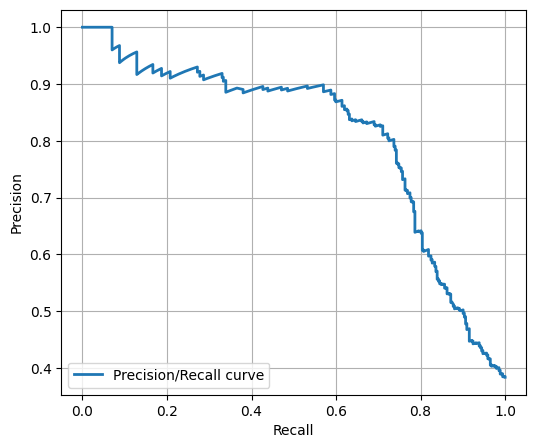

In [ ]:
# SVM 모델의 정밀도-재현율 곡선을 위한 값들 계산
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# 정밀도-재현율 곡선 그리기
plt.figure(figsize=(6, 5))
plt.plot(recalls_svm, precisions_svm, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend(loc="lower left")
plt.show()

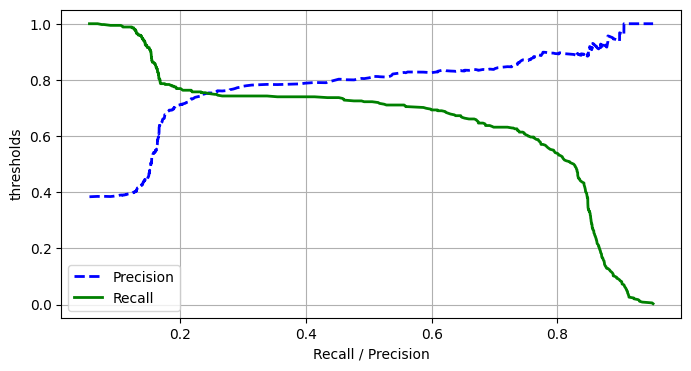

In [ ]:
# 임계값에 따른 정밀도와 재현율 변화 그래프
plt.figure(figsize=(8, 4))
plt.plot(thresholds_svm, precisions_svm[:-1], "b--", label="Precision", linewidth=2)  # 정밀도
plt.plot(thresholds_svm, recalls_svm[:-1], "g-", label="Recall", linewidth=2) # 재현도
plt.xlabel("Recall / Precision")
plt.ylabel("thresholds")
plt.grid()
plt.legend()
plt.show()

23. SVM 모델과 랜덤 포레스트 모델의 교차 검증 점수를 이용하여, 두 모델의 성능을 비교하는 박스 플랏 그래프를 그려보세요.

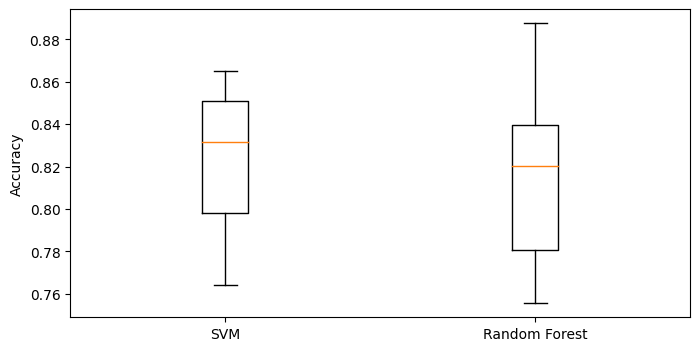

In [ ]:
# SVM과 Random Forest의 성능 비교를 위한 박스 플롯
plt.figure(figsize=(8, 4))
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

24. SVM 모델과 랜덤 포레스트 모델의 ROC 커브를 한 그래프 안에 그려보세요.

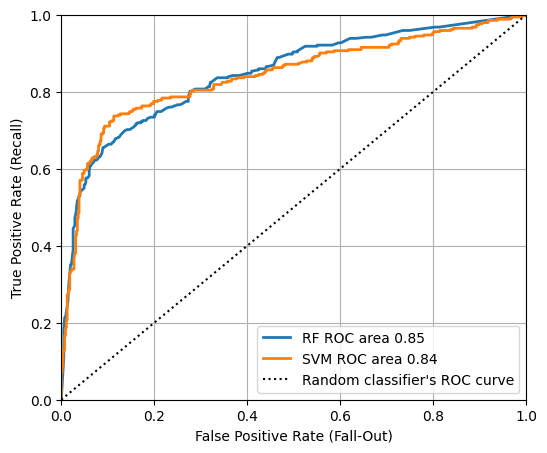

In [ ]:
# ROC 곡선을 위한 필요한 함수들 임포트
from sklearn.metrics import roc_curve, auc

# 양성 클래스에 대한 ROC 점수를 각 변수에 할당
# Random Forest와 SVM 각각의 ROC 곡선을 위한 값들 계산
# fpr: False Positive Rate (위양성률)
# tpr: True Positive Rate (재현율)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores[:, 1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_scores_svm[:, 1])

# ROC 곡선 그리기
plt.figure(figsize=(6, 5))
# Random Forest의 ROC 곡선
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="RF ROC area %.2f" %auc(fpr_rf, tpr_rf))
# SVM의 ROC 곡선
plt.plot(fpr_svm, tpr_svm, linewidth=2, label="SVM ROC area %.2f" %auc(fpr_svm, tpr_svm))
# 랜덤 분류기의 ROC 곡선 (대각선)
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=10)
plt.show()

25. SVM 모델과 랜덤 포레스트 모델의 ROC 커브의 AUC 점수를 구해보세요.

In [ ]:
# AUC(Area Under the Curve) 점수 계산을 위한 함수 임포트
from sklearn.metrics import roc_auc_score

# 각 모델의 AUC 점수 계산
auc = roc_auc_score(y_train, y_scores[:,1])
auc_svm = roc_auc_score(y_train, y_scores_svm[:,1])

# AUC 점수 출력
print('RF auc:', auc)
print('SVM auc:', auc_svm)

RF auc: 0.8460544956806102
SVM auc: 0.8407524579511925
